# Predicting Prices Using Neighborhood Group, Room Type, and Reviews

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data.csv'
df = pd.read_csv(file_path)

Display basic information and the first few rows of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Cleaning

Handling missing values

In [7]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Dropping features that do not influence price.

Here I pick feature I will use for price prediction

In [8]:
# dropping all column leaving neigbourhood group, neighbourhood, reviews and room type
df_cleaned = df.drop(['id','name', 'host_id','host_name',
                      'latitude', 'longitude', 'minimum_nights','last_review',
                      'reviews_per_month', 'calculated_host_listings_count',
                      'availability_365'],axis='columns')

# Verifying if  missing values have been addressed
missing_values_cleaned = df_cleaned.isnull().sum()

missing_values_cleaned

,0
neighbourhood_group,0
neighbourhood,0
room_type,0
price,0
number_of_reviews,0


In [9]:
# removing '/' from room_type data values and replacing it with
df_cleaned['room_type'] = df_cleaned['room_type'].str.replace('/', ' ')
df_cleaned.head()

,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews
0,Brooklyn,Kensington,Private room,149,9
1,Manhattan,Midtown,Entire home apt,225,45
2,Manhattan,Harlem,Private room,150,0
3,Brooklyn,Clinton Hill,Entire home apt,89,270
4,Manhattan,East Harlem,Entire home apt,80,9


In [10]:
df_cleaned.shape

(48895, 5)

Capping prices. Picking prices between 0 to 1000

In [11]:
data_frame_capped_prices = df_cleaned[(df_cleaned.price > 0) & (df_cleaned.price <= 1000)]

In [12]:
data_frame_capped_prices.head()

,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews
0,Brooklyn,Kensington,Private room,149,9
1,Manhattan,Midtown,Entire home apt,225,45
2,Manhattan,Harlem,Private room,150,0
3,Brooklyn,Clinton Hill,Entire home apt,89,270
4,Manhattan,East Harlem,Entire home apt,80,9


Filtered out review less than 0

In [13]:
filtered_reviews = data_frame_capped_prices[data_frame_capped_prices.number_of_reviews > 0]

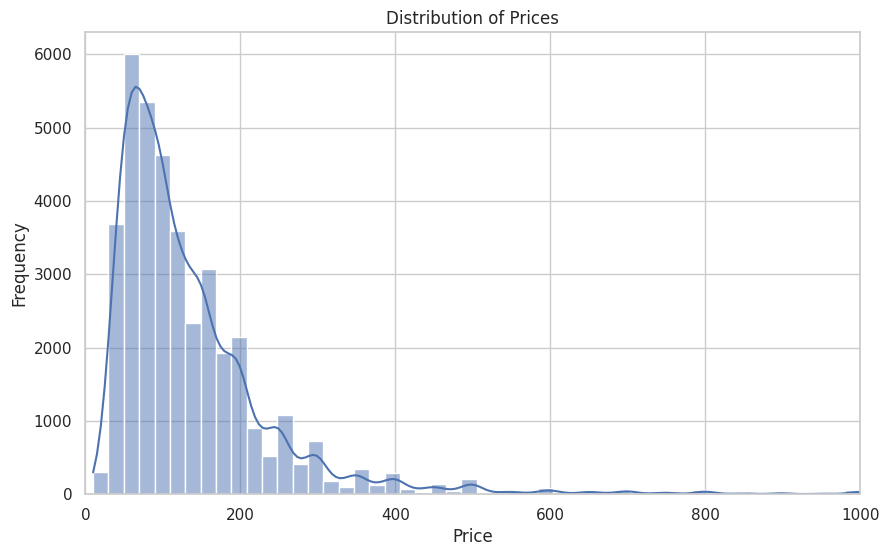

<ipython-input-14-13c546981bb4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_reviews, x='room_type', palette='Set2')


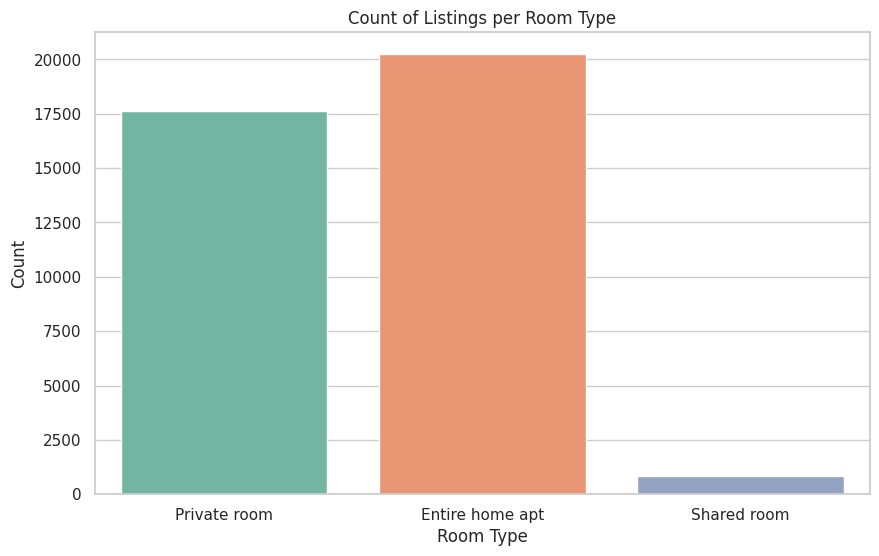

<ipython-input-14-13c546981bb4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_reviews, y='neighbourhood_group',


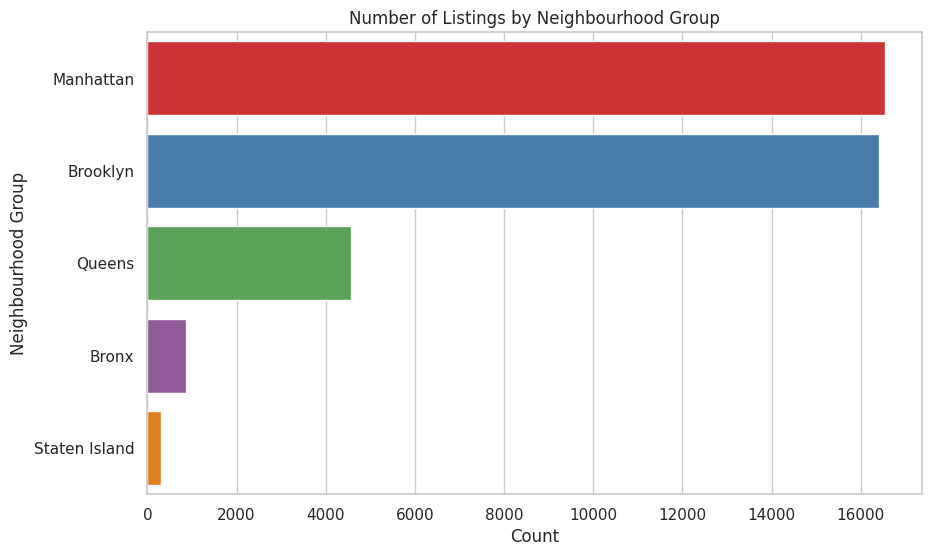

In [14]:
# @title Exploratory Data Analysis

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(filtered_reviews['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Limiting x-axis to focus on common price ranges
plt.show()

# Plotting the count of listings per room type
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_reviews, x='room_type', palette='Set2')
plt.title('Count of Listings per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# Plotting the number of listings by neighbourhood group
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_reviews, y='neighbourhood_group',
              order=filtered_reviews['neighbourhood_group'].value_counts().index,
              palette='Set1')
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
plt.show()

### Explanation for the plots above

1. <b>Price Distribution:</b>
The price distribution shows us how the prices of the listings are spread out. Most of the listings are priced below $1,000 per night, with many of them clustering around the lower price ranges from 1 to 200. This tells us that lower-priced listings are more common, and high-priced listings are rarer. This is important because it shows the general affordability of the listings in the dataset.

2. <b>Room Type Distribution:</b>
When we look at the room type distribution, we see that most of the listings are for entire homes or apartments. This is followed by private rooms, which are also quite common. However, there are far fewer shared rooms and hotel rooms available. This insight helps us understand what kind of accommodations are most popular or available in the market.

3. <b>Listings by Neighbourhood Group:</b>
This analysis shows us which neighborhoods group have the most listings. Manhattan and Brooklyn have the highest number of listings, meaning they are the most popular areas for these types of accommodations. In contrast, areas like the Bronx, Queens, and Staten Island have fewer listings. This is useful to know because it tells us where most of the listings are concentrated, which could reflect the demand or popularity of those neighborhoods groups and it would affect the price prediction of the model.

Created a new dataframe from the filtred_reviews for grouping neighbourhood_group and room_type

In [20]:
# Grouping by 'neighbourhood_group' and 'room_type', and calculating the mean for 'price' and 'number_of_reviews'
df_grouped_nei_group = filtered_reviews.groupby(['neighbourhood_group', 'room_type']).agg({
    'price': 'mean',
    'number_of_reviews': 'mean'
}).reset_index()

# Converting the 'price' and 'number_of_reviews' columns to integers after calculating the mean
df_grouped_nei_group['price'] = df_grouped_nei_group['price'].round().astype(int)
df_grouped_nei_group['number_of_reviews'] = df_grouped_nei_group['number_of_reviews'].round().astype(int)

df_grouped_nei_group.head(20)

,neighbourhood_group,room_type,price,number_of_reviews
0,Bronx,Entire home apt,121,38
1,Bronx,Private room,57,31
2,Bronx,Shared room,57,10
3,Brooklyn,Entire home apt,165,33
4,Brooklyn,Private room,71,27
5,Brooklyn,Shared room,46,20
6,Manhattan,Entire home apt,215,24
7,Manhattan,Private room,104,33
8,Manhattan,Shared room,78,29
9,Queens,Entire home apt,138,35


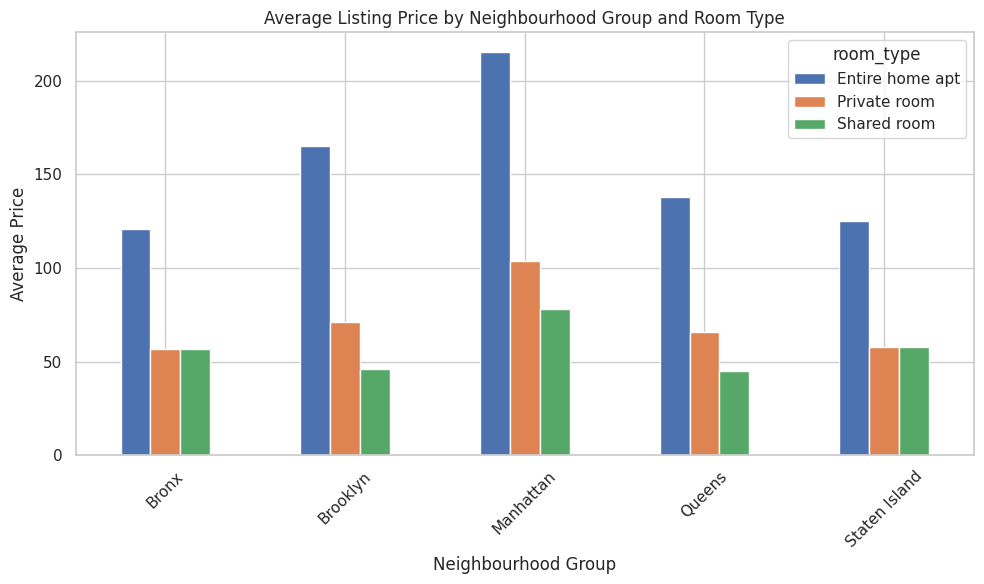

In [21]:
# @title Average Listing Price by Neighbourhood Group and Room Type

df_pivot = df_grouped_nei_group.pivot_table(index='neighbourhood_group', columns='room_type', values='price', aggfunc='mean')

df_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Listing Price by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b>Average Listing Price by Neighbourhood Group and Room Type:</b>

This bar chart shows how the average listing price varies across different neighborhoods and room types. The blue bars represent entire homes/apartments, which are the most expensive, followed by private rooms (orange bars), and shared rooms (green bars). Manhattan has the highest prices for all room types, while the Bronx generally has the lowest. This tells us that location and type of accommodation significantly affect the price.

Created a new dataframe from the data frame grouped by neighbourhood group and room_type to check which neighboured is expensive by calculating the avg from all the prices related to each neighbourhood group

In [16]:
'''
This is to check for which neighbourhood group is expensive by calculating the avg/mean
'''
# Grouping by 'neighbourhood_group' and calculating the mean for 'price' and 'number_of_reviews'
df_avg = df_grouped_nei_group.groupby(['neighbourhood_group']).agg({
    'price': 'mean',
    'number_of_reviews': 'mean'

}).reset_index()

# Converting the 'price' and 'number_of_reviews' columns to integers after calculating the mean
df_avg['price'] = df_avg['price'].round().astype(int)
df_avg['number_of_reviews'] = df_avg['number_of_reviews'].round().astype(int)

df_avg.head(20)

,neighbourhood_group,price,number_of_reviews
0,Bronx,78,26
1,Brooklyn,94,27
2,Manhattan,132,29
3,Queens,83,29
4,Staten Island,80,26


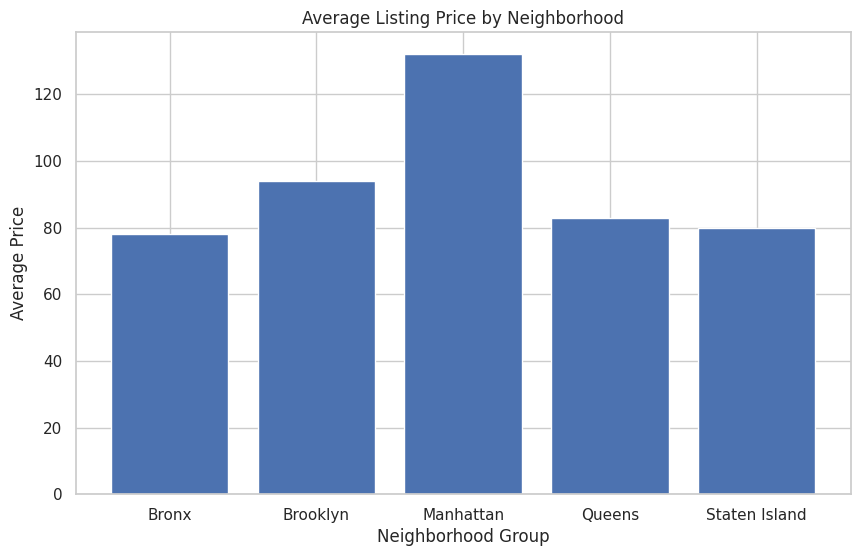

In [22]:
# @title Average Listing Price by Neighborhood

plt.figure(figsize=(10, 6))
plt.bar(df_avg['neighbourhood_group'], df_avg['price'])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.title('Average Listing Price by Neighborhood')
plt.show()

<b>Average Listing Price by Neighborhood Group:</b>

In this chart, we see the average listing price for each neighborhood group. Manhattan stands out with the highest average price, while the Bronx and Staten Island have the lowest. This indicates that Manhattan is the most expensive area for listings, likely due to its high demand and central location.

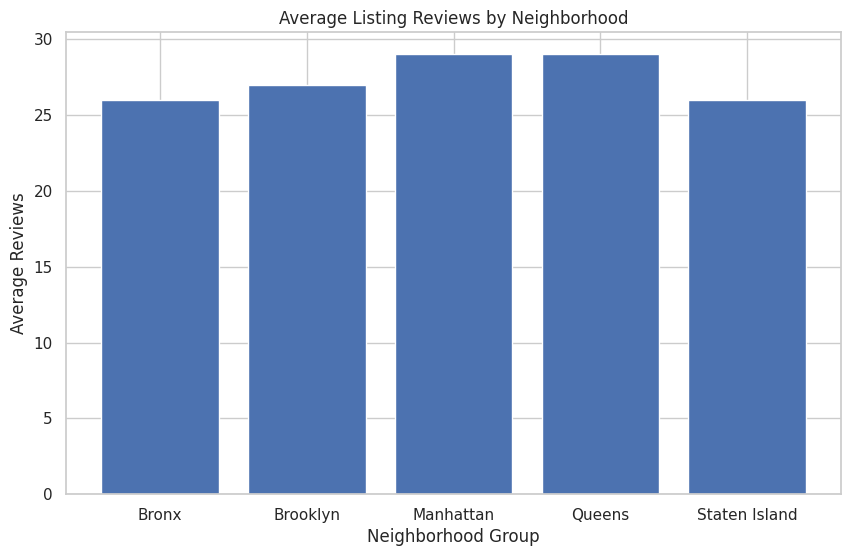

In [23]:
# @title Average Listing Reviews by Neighborhood

plt.figure(figsize=(10, 6))
plt.bar(df_avg['neighbourhood_group'], df_avg['number_of_reviews'])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Reviews')
plt.title('Average Listing Reviews by Neighborhood')
plt.show()

<b>Average Listing Reviews by Neighborhood:</b>

This chart shows the average number of reviews for listings in each neighborhood. Queens and Manhattan has the highest average reviews, followed by Brooklyn and Staten Island, while Bronx has slightly lower review count. This might suggest higher customer engagement or satisfaction in Queens and Manhattan, which could influence demand in these areas.

<b>Discussion:</b>

These visualizations provide insights into the factors that might influence the prediction model. Higher prices in certain neighborhoods (like Manhattan) and for specific room types (like entire homes) suggest that these features will have a strong impact on the predicted prices. The number of reviews might also indirectly affect predictions.

## Model Building

In [55]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



Selecting features and target variable

In [56]:
X = filtered_reviews[['neighbourhood_group', 'room_type', 'number_of_reviews']]

y = filtered_reviews['price']

In [26]:
X.shape

(38726, 3)

In [27]:
y.head()

,price
0,149
1,225
3,89
4,80
5,200


In [57]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Preprocessing categorical variables using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['neighbourhood_group', 'room_type'])
    ],
    remainder='passthrough'  # Pass through other columns without transformation
)

Building a deep learning model

In [90]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

# Preprocessing the categorical features using one-hot encoding
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)



# Building a more complex neural network model
model_dl_enhanced = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
from tensorflow.keras.optimizers import Adam

# Creating an Adam optimizer with a learning rate
adam_optimizer = Adam(learning_rate=0.0001)

In [92]:
# Compile the model
model_dl_enhanced.compile(optimizer=adam_optimizer, loss='mean_absolute_error', metrics=['mae'])

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [94]:
# Train the model with early stopping
history_enhanced = model_dl_enhanced.fit(
    X_train_preprocessed, y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=128,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 126.1586 - mae: 126.1586 - val_loss: 113.8769 - val_mae: 113.8769
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 106.2791 - mae: 106.2791 - val_loss: 65.0364 - val_mae: 65.0364
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 62.3093 - mae: 62.3093 - val_loss: 54.5258 - val_mae: 54.5258
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 56.7783 - mae: 56.7783 - val_loss: 57.1448 - val_mae: 57.1448
Epoch 5/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 54.4043 - mae: 54.4043 - val_loss: 54.5442 - val_mae: 54.5442
Epoch 6/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 53.8184 - mae: 53.8184 - val_loss: 55.2056 - val_mae: 55.2056
Epoch 7/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 54.4775 - mae: 54.4775 - val_loss: 54.9064 - val_mae: 54.9064
Epoch 8/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 52.8697 - mae: 52.8697 - val_loss: 52.9124 - val_mae: 52.9124
Ep

In [ ]:
# Evaluate the enhanced model
mae_dl_enhanced = model_dl_enhanced.evaluate(X_test_preprocessed, y_test, verbose=0)[1]

print(f'MAE -> {mae_dl_enhanced}')

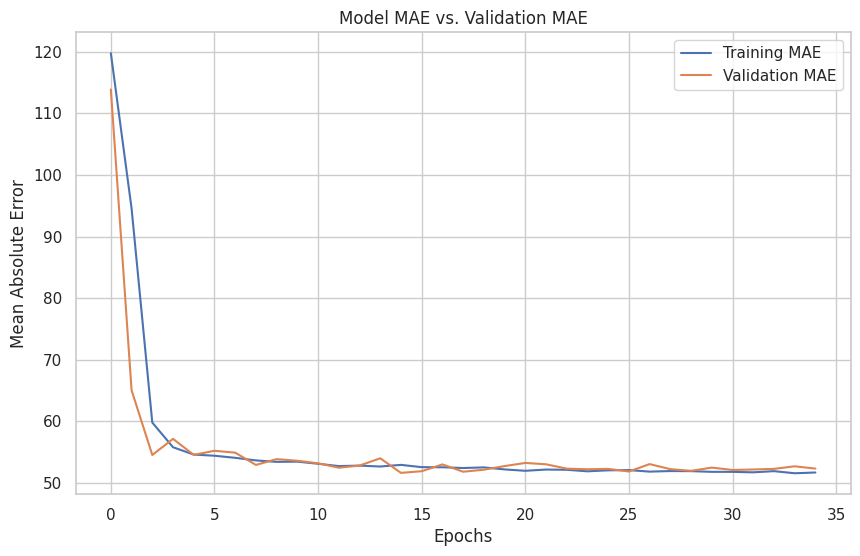

In [96]:
# Plot the MAE and val_mae over epochs
plt.figure(figsize=(10, 6))
plt.plot(history_enhanced.history['mae'], label='Training MAE')
plt.plot(history_enhanced.history['val_mae'], label='Validation MAE')
plt.title('Model MAE vs. Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
model_dl_enhanced.save('/content/drive/MyDrive/Colab Notebooks/model_dl49_enhanced1.h5')

🔴🔴🔴🔴🔴

<b>Notes on my model</b>

After running my deep learning model, I observed that the Mean Absolute Error (MAE) is 49.73. This value tells me that, on average, my model's predictions are off by about 49.73 units, which could be dollars if I'm predicting prices.

In simpler terms, this means that when my model tries to predict a price, it might be wrong by around 50 dollars, more or less. While this isn't perfect, it's a decent starting point. The model has learned some patterns from the data, but there's room for improvement.

Thank you for considering my application.

In [125]:
# Load the saved model
loaded_model = models.load_model('/content/drive/MyDrive/Colab Notebooks/model_dl49_enhanced1.h5')

In [98]:
import numpy as np

def predict_price(neighbourhood_group, room_type, number_of_reviews):
    # Input features as a DataFrame
    input_data = pd.DataFrame({
        'neighbourhood_group': [neighbourhood_group],
        'room_type': [room_type],
        'number_of_reviews': [number_of_reviews],
    })

    # Preprocess the input data
    input_data_preprocessed = preprocessor.transform(input_data)

    # Predict the price using the enhanced deep learning model
    predicted_price = loaded_model.predict(input_data_preprocessed)

    return np.round(predicted_price[0, 0], 2)


# Testing predictions on all neightbourhood groups

Testing prediction on same features but different neighourhood

In [99]:
room_type = 'Private room'
number_of_reviews = 100

same_features = [
      ('Manhattan', room_type,  number_of_reviews),
      ('Brooklyn', room_type,  number_of_reviews),
      ('Bronx', room_type,  number_of_reviews),
      ('Queens', room_type,  number_of_reviews),
      ('Staten Island', room_type,  number_of_reviews),
    ]

for features in same_features:
    neighbourhood_group, room_type, number_of_reviews = features
    predicted_price = predict_price(neighbourhood_group, room_type, number_of_reviews)
    print(f"Predicted price for {neighbourhood_group} neighbourhood: ${predicted_price:2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted price for Manhattan neighbourhood: $83.37999725341797
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted price for Brooklyn neighbourhood: $53.65999984741211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted price for Bronx neighbourhood: $34.2400016784668
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted price for Queens neighbourhood: $44.77000045776367
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted price for Staten Island neighbourhood: $36.4900016784668


Testing prediction on same different and neighbourhood groups

In [123]:

differnt_features = [
    [
      ('Manhattan', 'Entire home apt', 50),
      ('Brooklyn', 'Private room', 150),
      ('Bronx', 'Shared room', 20),
      ('Queens', 'Entire home apt', 80),
      ('Staten Island', 'Private room', 100)
  ],
    [
      ('Manhattan', 'Shared room', 10),
      ('Brooklyn', 'Entire home apt', 200),
      ('Bronx', 'Private room', 75),
      ('Queens', 'Shared room', 30),
      ('Staten Island', 'Entire home apt', 120)
  ],
   [
      ('Manhattan', 'Private room', 180),
      ('Brooklyn', 'Shared room', 15),
      ('Bronx', 'Entire home apt', 60),
      ('Queens', 'Private room', 90),
      ('Staten Island', 'Shared room', 40)
  ],
    [
      ('Manhattan', 'Shared room', 25),
      ('Brooklyn', 'Entire home apt', 160),
      ('Bronx', 'Private room', 100),
      ('Queens', 'Shared room', 40),
      ('Staten Island', 'Entire home apt', 140)
  ],
    [
      ('Manhattan', 'Entire home apt', 100),
      ('Brooklyn', 'Private room', 80),
      ('Bronx', 'Shared room', 50),
      ('Queens', 'Entire home apt', 120),
      ('Staten Island', 'Private room', 60)
  ]

]

diff_feature_count = 0
diff_features_predicted = []
for different_feature in differnt_features:
  f = []
  for features in different_feature:
    neighbourhood_group, room_type, number_of_reviews = features
    predicted_price = predict_price(neighbourhood_group, room_type, number_of_reviews)
    f.append(f"Predicted price for {neighbourhood_group} neighbourhood group: ${predicted_price:2}\nRoom type:{room_type}\nNumber of reviews: {number_of_reviews}")

  diff_features_predicted.append(f)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [124]:
for i in range(0, len(diff_features_predicted)):
  for j in range(0, len(diff_features_predicted[i])):
    print(diff_features_predicted[i][j], '\n')

Predicted price for Manhattan neighbourhood group: $173.32000732421875
Room type:Entire home apt
Number of reviews: 50 

Predicted price for Brooklyn neighbourhood group: $47.45000076293945
Room type:Private room
Number of reviews: 150 

Predicted price for Bronx neighbourhood group: $24.899999618530273
Room type:Shared room
Number of reviews: 20 

Predicted price for Queens neighbourhood group: $120.83999633789062
Room type:Entire home apt
Number of reviews: 80 

Predicted price for Staten Island neighbourhood group: $36.4900016784668
Room type:Private room
Number of reviews: 100 

Predicted price for Manhattan neighbourhood group: $64.30000305175781
Room type:Shared room
Number of reviews: 10 

Predicted price for Brooklyn neighbourhood group: $119.77999877929688
Room type:Entire home apt
Number of reviews: 200 

Predicted price for Bronx neighbourhood group: $38.459999084472656
Room type:Private room
Number of reviews: 75 

Predicted price for Queens neighbourhood group: $29.0
Room 

You can compare the predicted prices to the prices to the tables below to see how the predictions are close to the average calculated for each neighbourhood and room type

In [ ]:
# @title Average Listing Price and Reviews by Neighborhood Group with Room Type
df_grouped_nei_group.head(20)

,neighbourhood_group,room_type,price,number_of_reviews
0,Bronx,Entire home apt,121,38
1,Bronx,Private room,57,31
2,Bronx,Shared room,57,10
3,Brooklyn,Entire home apt,165,33
4,Brooklyn,Private room,71,27
5,Brooklyn,Shared room,46,20
6,Manhattan,Entire home apt,215,24
7,Manhattan,Private room,104,33
8,Manhattan,Shared room,78,29
9,Queens,Entire home apt,138,35


In [ ]:
# @title Average Listing Price and Reviews by Neighborhood Group
df_avg.head(20)

,neighbourhood_group,price,number_of_reviews
0,Bronx,78,26
1,Brooklyn,94,27
2,Manhattan,132,29
3,Queens,83,29
4,Staten Island,80,26
